# Telco Dataset: preprocessing and model evaluation

This Notebook is the product of an academic group work for course[ Artificial Intelligence & Robotics](https://kursuskatalog.cbs.dk/2019-2020/KAN-CINTO1820U.aspx), held at Copenhagen Business School during spring 2020.

Authors:
Scarperi, M., Abate, E.



## 1. First look at the dataset

###  Load Telco Customer Churn Data
Notice that the dataset can be retrieved at https://www.kaggle.com/blastchar/telco-customer-churn/data

In [0]:
import pandas as pd
import numpy as np

In [2]:
# Make sure the dataset is nested within folder "Data"
df = pd.read_csv("Data/Telco-Customer-Churn.csv",index_col=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Initial reflections  
The dataset contains a total of 20 features. Most of the feature columns are of type "Object" as they contain strings. They are *all* of categorical nature, and 12 of them are boolean categories (Yes/No). 

Three columns are of numerical nature `SeniorCitizen`(int64), `tenure`(int64) `MonthlyCharges`(float64). Surprisingly, `TotalCharges` is not a *float64* like `MonthlyCharges`, but an Object. We will investigate this further later on in this Notebook.

In [3]:
#There are no NAs. "count" returns 7043 for all features
df.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### A more in-depth look at string features
We now want to understand the value structure of each string feature. We want to get an overview of:
- (1) the amount of unique values for each string feature; 
- (2) the unique values for each string feature.
Some of them are structured in a binary way. We can easily one hot encode these features using a single additional column.

Some other features present more categories, and they will have to be handled different. One hot enconding them will yield creating one additional column per unique value.

In [4]:
# We want to understand which string attributes are binary, which are of a higher category order
for col in df: 
    if df.dtypes[col]==np.object: # We disregard numerical attributes and only take a look at objects
        print(col,'(', len(df[col].unique()), ' unique values): ', df[col].unique(),'\n') 
        

gender ( 2  unique values):  ['Female' 'Male'] 

Partner ( 2  unique values):  ['Yes' 'No'] 

Dependents ( 2  unique values):  ['No' 'Yes'] 

PhoneService ( 2  unique values):  ['No' 'Yes'] 

MultipleLines ( 3  unique values):  ['No phone service' 'No' 'Yes'] 

InternetService ( 3  unique values):  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

OnlineBackup ( 3  unique values):  ['Yes' 'No' 'No internet service'] 

DeviceProtection ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

TechSupport ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

StreamingTV ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

StreamingMovies ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

Contract ( 3  unique values):  ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ( 2  unique values):  ['Yes' 'No'] 

PaymentMethod ( 4  unique values):  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Cre

## 2. Pre-processing

### Pre-processing string features
Some features present three unique values such as "Yes", "No" and "No internet service". We argue that "No internet service" can be merged into "No" with little harm done to the overall information. 

For the sake of integrity, we can save the information that the customer has "no internet service" in a new, additional, column. 


We now proceed with replacing value "No internet service" with "No" for a variety of columns.
For the same reason, value "No phone service" for feature `MultipleLines` is replaced with "No".


We use the dataframe method `replace()` to accomplish this.

In [5]:
# For the following list of features, we want to replace "No internet service" with "No"
featuresToProcess = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace "No internet service" with "No" for all of the above features
for feature in featuresToProcess:
    df = df.replace({feature: 'No internet service'}, 'No')

# Replace "No phone service" with "No" for attribute 'MultipleLines'
df = df.replace({'MultipleLines': 'No phone service'}, 'No')

# We check whether those attributes now present 2 unique values
for col in df: 
    if df.dtypes[col]==np.object: # Again, we disregard numerical attributes
        print(col,'(', len(df[col].unique()), ' unique values): ', df[col].unique(),'\n') 

gender ( 2  unique values):  ['Female' 'Male'] 

Partner ( 2  unique values):  ['Yes' 'No'] 

Dependents ( 2  unique values):  ['No' 'Yes'] 

PhoneService ( 2  unique values):  ['No' 'Yes'] 

MultipleLines ( 2  unique values):  ['No' 'Yes'] 

InternetService ( 3  unique values):  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ( 2  unique values):  ['No' 'Yes'] 

OnlineBackup ( 2  unique values):  ['Yes' 'No'] 

DeviceProtection ( 2  unique values):  ['No' 'Yes'] 

TechSupport ( 2  unique values):  ['No' 'Yes'] 

StreamingTV ( 2  unique values):  ['No' 'Yes'] 

StreamingMovies ( 2  unique values):  ['No' 'Yes'] 

Contract ( 3  unique values):  ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ( 2  unique values):  ['Yes' 'No'] 

PaymentMethod ( 4  unique values):  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

TotalCharges ( 6531  unique values):  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

Churn ( 2  unique values):  

### Pre-processing binary features
The next step is to *one-hot* encode binary features. We make us of `get_dummies()` and a small function written by us, `boolify()`, to create new columns in the dataset.

For each binary feature, we generate a single `bool` column. Value "`Yes`" is cast into `1`, while "`No`" is cast into `0`.

Feature `gender` is handled in a similar way, though the generated `boolMale` column simply  represents "`Male`" as `1` and "`Female`" as `0`.

In [6]:
# Our boolify() takes a dataframe and a column as input, returns the same dataset with a new column, 
# where the input column is encoded with binary values.
def boolify(dataframe, columns):
    boolDataframe = dataframe; #Instantiate the input dataframe locally
    for columnName in columns:
        oneHotColumns = pd.get_dummies(dataframe[columnName])
        oneHotColumns = oneHotColumns.drop('No', axis = 1) # We are only interested in keeping the "Yes"
        oneHotColumns = oneHotColumns.rename(columns={"Yes": "bool"+columnName}, errors="raise")
        boolDataframe = boolDataframe.join(oneHotColumns) # We add the binary column to the input dataframe
    return boolDataframe


# We first turn binary columns into one hot encoded columns
df = boolify(df, ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'])


# We turn "gender" column into a boolean one hot encoded column 'boolMale'
oneHotColumns = pd.get_dummies(df['gender'])
oneHotColumns = oneHotColumns.drop('Female',axis = 1)
oneHotColumns = oneHotColumns.rename(columns={"Male": "boolMale"}, errors="raise")
df = df.join(oneHotColumns)

print(df.head())

            gender  SeniorCitizen  ... boolChurn boolMale
customerID                         ...                   
7590-VHVEG  Female              0  ...         0        0
5575-GNVDE    Male              0  ...         0        1
3668-QPYBK    Male              0  ...         1        1
7795-CFOCW    Male              0  ...         0        1
9237-HQITU  Female              0  ...         1        0

[5 rows x 33 columns]


### Pre-processing string features with multiple values
Columns `InternetService`, `Contract` and `PaymentMethod` present multiple unique values. We generate *one-hot encoded* columns for each unique value, for all three features.

The *one-hot* encoded columns are then added to the already processed dataframe.

In [0]:
# We one hot encode column "InternetService"
oneHotColumns = pd.get_dummies(df['InternetService'], prefix='boolInternetService')
df = df.join(oneHotColumns)

# We one hot encode column "Contract"
oneHotColumns = pd.get_dummies(df['Contract'], prefix='boolContract')
df = df.join(oneHotColumns)

# We one hot encode column "PaymentMethod"
oneHotColumns = pd.get_dummies(df['PaymentMethod'], prefix='boolPaymentMethod')
df = df.join(oneHotColumns)

### Pre-processing feature `TotalCharges`
As previously noticed, `TotalCharges` is of type Object instead of Float64.
We first tried to conver it to `float` using astype(). However, this throws an exception.

We therefore try to figure out what values are causing this issue. According to StackOverflow, this is most likely caused by a whitespaces.

In [8]:
# Using `df["TotalCharges"] = df["TotalCharges"].astype(float)` throws an exception
validValues = 0
notNumericValues = []
for string in df['TotalCharges']:
    if " " in string:
        notNumericValues.append(string)
        
print("Found (",len(notNumericValues),") whitespaces")
print(notNumericValues)

Found ( 11 ) whitespaces
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


### Fixing `TotalCharges`
We drop (11) rows with whitespaces entries for `TotalCharges`. Then, we can finally convert `TotalCharges` to float

In [9]:
df = df[df["TotalCharges"]!= " "]
df = df.reset_index()[df.columns]

# We can finally convert TotalCharges to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   gender                                       7032 non-null   object 
 1   SeniorCitizen                                7032 non-null   int64  
 2   Partner                                      7032 non-null   object 
 3   Dependents                                   7032 non-null   object 
 4   tenure                                       7032 non-null   int64  
 5   PhoneService                                 7032 non-null   object 
 6   MultipleLines                                7032 non-null   object 
 7   InternetService                              7032 non-null   object 
 8   OnlineSecurity                               7032 non-null   object 
 9   OnlineBackup                                 7032 non-null   object 
 10  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale,boolInternetService_DSL,boolInternetService_Fiber optic,boolInternetService_No,boolContract_Month-to-month,boolContract_One year,boolContract_Two year,boolPaymentMethod_Bank transfer (automatic),boolPaymentMethod_Credit card (automatic),boolPaymentMethod_Electronic check,boolPaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


### Normalizing numerical features
Columns `tenure`, `MonthlyCharges` and `TotalCharges` contain numbers. It is good practice to squash their values between 0 and 1, as this will reduce training time for our models later on.


In [10]:
# We get all the numerical features
data = df.select_dtypes(np.number)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale,boolInternetService_DSL,boolInternetService_Fiber optic,boolInternetService_No,boolContract_Month-to-month,boolContract_One year,boolContract_Two year,boolPaymentMethod_Bank transfer (automatic),boolPaymentMethod_Credit card (automatic),boolPaymentMethod_Electronic check,boolPaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


In [11]:
def normalizeColumn(dataframe, columns):
    for column in columns:
        minVal = data[column].min()
        maxVal = data[column].max()
        dataframe[column] = ( dataframe[column] - minVal ) / (maxVal - minVal)
    return dataframe;

data = normalizeColumn(data, ["tenure", "MonthlyCharges", "TotalCharges"])
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale,boolInternetService_DSL,boolInternetService_Fiber optic,boolInternetService_No,boolContract_Month-to-month,boolContract_One year,boolContract_Two year,boolPaymentMethod_Bank transfer (automatic),boolPaymentMethod_Credit card (automatic),boolPaymentMethod_Electronic check,boolPaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


## 3. Models evaluation
In this section, we evaluate the performance of various *machine learning* models, as well as a small *neural network*.

To do so, we first define training and a test data from the previously pre-processed dataset.

In [12]:
from sklearn.model_selection import train_test_split
y = data["boolChurn"]
X = data.drop('boolChurn',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 26) (5625,)
(1407, 26) (1407,)


### Machine Learning models

#### Classifiers list

The models we evaluate are: 
- K-NN Classifier
- Support Vector Classifier (SVC)
- Logistic Regression Classifier
- Random Forest Classifier
- Naive Bayes Classifier.

For each classifier, we run a Grid Search with cross-validation. After a first Grid Search, we plot the runs using a function written by us `plotGridSearchRuns()` to keep the code more clean.

`plotGridSearchRuns()` visualizes a heat-map with all the runs of cross-validation, with a particular
parameter setting. Cross-validation accuracy is encoded with color. The lighter the color, the higher the accuracy.  It allows us to optimize the region searched for the various parameters.

`plotGridSearchRuns()` can only plot two parameters from the parameter grid, since it would become troublesome to visualize more than three dimensions (the three dimensions being the two parameters and the accuracy).

In [0]:
# Since we run this Notebook on Colab, we had to install mglearn using pip
# !pip install mglearn

In [0]:
from sklearn.model_selection import GridSearchCV

# The following simply generalize our GridSearchCV code, so that future sections are easier to read
def runGridSearch(model, param_grid, cv=5):
  global grid_search
  grid_search = GridSearchCV(model, param_grid, cv=cv)
  grid_search.fit(X_train, y_train)
  print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
  print("Best parameters: {}".format(grid_search.best_params_))
  print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Notice that the following function only supports two input parameters.
# It would become troublesome to visualize more than three dimensions (the two parameters and the accuracy)
import mglearn

def plotGridSearchRuns(firstParam, secondParam, cmap="viridis"):
  results = pd.DataFrame(grid_search.cv_results_)
  scores = np.array(results.mean_test_score).reshape(len(param_grid[firstParam]), len(param_grid[secondParam]))
  mglearn.tools.heatmap(scores, xlabel=secondParam, xticklabels=param_grid[secondParam],
  ylabel=firstParam, yticklabels=param_grid[firstParam], cmap=cmap)
  


#### k-Nearest Neighbors (k-NN)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [1, 3, 5, 7, 10],
'weights': ['uniform', 'distance']}


runGridSearch(KNeighborsClassifier(), param_grid)

Test set score: 0.77
Best parameters: {'n_neighbors': 10, 'weights': 'uniform'}
Best cross-validation score: 0.77


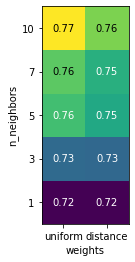

In [51]:
plotGridSearchRuns('n_neighbors', 'weights')

In [55]:
param_grid = {'n_neighbors': [7, 10, 12, 14, 16],
'weights': ['uniform', 'distance']}


runGridSearch(KNeighborsClassifier(), param_grid)

Test set score: 0.78
Best parameters: {'n_neighbors': 12, 'weights': 'uniform'}
Best cross-validation score: 0.78


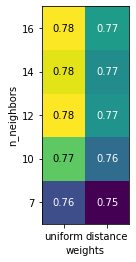

In [56]:
plotGridSearchRuns('n_neighbors', 'weights')

#### Naive Bayes Classifier

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

runGridSearch(LogisticRegression(), param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Test set score: 0.81
Best parameters: {'C': 100, 'solver': 'saga'}
Best cross-validation score: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


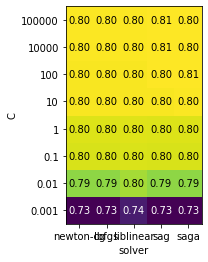

In [40]:
plotGridSearchRuns('C', 'solver')

In [45]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 10000, 1000000, 10000000],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'max_iter': [40000]} # We are setting `max_iter` to avoid "convergence warning"

runGridSearch(LogisticRegression(), param_grid)

Test set score: 0.81
Best parameters: {'C': 10, 'max_iter': 40000, 'solver': 'sag'}
Best cross-validation score: 0.80


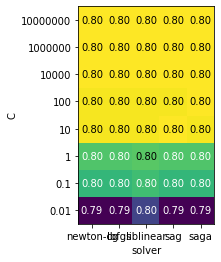

In [46]:
plotGridSearchRuns('C', 'solver')

#### Linear Support Vector Machines (Linear SVC)

#### Random Forest Classifier

#### Support Vector Classifier (SVC)

In [14]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


runGridSearch(SVC(), param_grid)

Test set score: 0.81


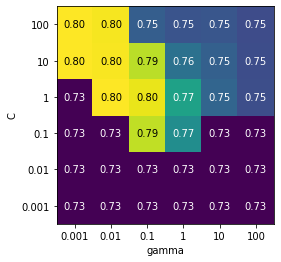

In [24]:
plotGridSearchRuns('C', 'gamma')

In [30]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
'gamma': [1e-06, 1e-05, 1e-04, 0.001, 0.01, 0.1]}

runGridSearch(SVC(), param_grid)

Test set score: 0.80
Best parameters: {'C': 1000, 'gamma': 1e-05}
Best cross-validation score: 0.80


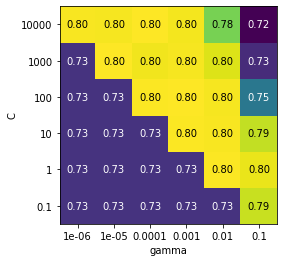

In [38]:
plotGridSearchRuns('C', 'gamma')

### Deep Learning model

#### Multi-Layer Perceptron (MLP)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras import optimizers

# define the keras model
model = Sequential()
model.add(Dense(5, input_dim=26, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Adam = optimizers.Adam(learning_rate=0.003)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=10)


Epoch 1/200
5625/5625 [==============================] - 1s 171us/step - loss: 0.4970 - accuracy: 0.7568
Epoch 2/200
5625/5625 [==============================] - 1s 160us/step - loss: 0.4263 - accuracy: 0.7964
Epoch 3/200
5625/5625 [==============================] - 1s 134us/step - loss: 0.4211 - accuracy: 0.7963
Epoch 4/200
5625/5625 [==============================] - 1s 168us/step - loss: 0.4189 - accuracy: 0.8027
Epoch 5/200
5625/5625 [==============================] - 1s 217us/step - loss: 0.4166 - accuracy: 0.7977
Epoch 6/200
5625/5625 [==============================] - 2s 271us/step - loss: 0.4143 - accuracy: 0.8036
Epoch 7/200
5625/5625 [==============================] - 2s 272us/step - loss: 0.4136 - accuracy: 0.8046
Epoch 8/200
5625/5625 [==============================] - 1s 240us/step - loss: 0.4129 - accuracy: 0.8046
Epoch 9/200
5625/5625 [==============================] - 2s 269us/step - loss: 0.4126 - accuracy: 0.8030
Epoch 10/200
5625/5625 [==============================

5625/5625 [==============================] - 1s 244us/step - loss: 0.4027 - accuracy: 0.8112
Epoch 77/200
5625/5625 [==============================] - 1s 225us/step - loss: 0.4036 - accuracy: 0.8091
Epoch 78/200
5625/5625 [==============================] - 1s 231us/step - loss: 0.4035 - accuracy: 0.8091
Epoch 79/200
5625/5625 [==============================] - 2s 281us/step - loss: 0.4036 - accuracy: 0.8096
Epoch 80/200
5625/5625 [==============================] - 1s 263us/step - loss: 0.4030 - accuracy: 0.8098
Epoch 81/200
5625/5625 [==============================] - 1s 238us/step - loss: 0.4022 - accuracy: 0.8105
Epoch 82/200
5625/5625 [==============================] - 1s 231us/step - loss: 0.4034 - accuracy: 0.8105
Epoch 83/200
5625/5625 [==============================] - 1s 248us/step - loss: 0.4027 - accuracy: 0.8119
Epoch 84/200
5625/5625 [==============================] - 1s 232us/step - loss: 0.4037 - accuracy: 0.8092
Epoch 85/200
5625/5625 [==============================] - 1

5625/5625 [==============================] - 1s 244us/step - loss: 0.3986 - accuracy: 0.8158
Epoch 153/200
5625/5625 [==============================] - 1s 248us/step - loss: 0.3996 - accuracy: 0.8133
Epoch 154/200
5625/5625 [==============================] - 1s 246us/step - loss: 0.3993 - accuracy: 0.8181
Epoch 155/200
5625/5625 [==============================] - 1s 213us/step - loss: 0.3987 - accuracy: 0.8153
Epoch 156/200
5625/5625 [==============================] - 1s 233us/step - loss: 0.3990 - accuracy: 0.8160
Epoch 157/200
5625/5625 [==============================] - 1s 219us/step - loss: 0.3984 - accuracy: 0.8148
Epoch 158/200
5625/5625 [==============================] - 1s 239us/step - loss: 0.3987 - accuracy: 0.8162
Epoch 159/200
5625/5625 [==============================] - 1s 232us/step - loss: 0.3980 - accuracy: 0.8149
Epoch 160/200
5625/5625 [==============================] - 1s 217us/step - loss: 0.3974 - accuracy: 0.8180
Epoch 161/200
5625/5625 [==========================

In [0]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1407/1407 [==============================] - 0s 24us/step
Accuracy: 78.82


In [0]:
model.predict(X_test[1:2])
y_test

5552    0
5805    0
2640    0
3976    1
6429    1
       ..
2752    0
5693    1
1657    1
2761    0
2913    0
Name: boolChurn, Length: 1407, dtype: uint8